# CSCI7000 - Mathematical & Computational Modeling of Infectious Diseases
## Homework 3
- Author: Corey Lynn Murphey
- Instructor: Prof. Dan Larremore
- Deadline: 17 March 2023 

Please note that discussion-based problems are not included in this notebook. You can find those responses in the homework PDF. 

## Libraries Imported

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

## Problem 2

### 2 c
Using these parameters, code up a version of your model with initial conditions $s_0 = 0.999$ and
$i_0 = 0.001$ in each group.1 Simulate an epidemic wave using an appropriate timestep ∆t and
appropriate maximum simulation time to capture the wave. Create a plot of the four populations’
I compartments vs time, showing $i_1(t)$, $i_2(t)$, $i_3(t)$, and $i_4(t)$. Color these curves in a single
hue, but with varying levels of light/dark or saturation, such that the boldest and darkest line is
the most susceptible group, and the faintest and lightest line is the least susceptible group.


In [47]:
# forward Euler step
def step(deltat, y_old, t_old, dydt):
    y_new = deltat*dydt + y_old # new y value
    t_new = t_old + deltat # new t value
    return y_new, t_new

# not generalized. Specifically a forward Euler solver 
#     for our SIR equation
def forwardEulerSIR(IC, dt, t_max, coeffs):
    c_bar, p, gamma, N = coeffs
    s0, i0, r0 = IC
    
    # initialize
    ts = np.arange(0, t_max, dt) # create the time array between 0 - t_max
    n = ts.size # number of time steps

    s = np.zeros((n,4))
    i = np.zeros((n,4))
    r = np.zeros((n,4))

    # initial conditions
    s[0,:] = s0*np.ones((1,4))
    i[0,:] = i0*np.ones((1,4))
    r[0,:] = r0*np.ones((1,4))
    
    # loop, forwardEuler
    for j in range(n-1): 
        # compute the derivative at the last time step
        sp, ip, rp = SIR_Deriv(s[j,:], i[j,:], c_bar, p, gamma, N)
        
        # compute next step forward
        for k in range(4):
            s[j+1, k], t_new = step(dt, s[j, k], ts[j], sp[k])
            i[j+1, k], t_new = step(dt, i[j, k], ts[j], ip[k])
            r[j+1, k], t_new = step(dt, r[j, k], ts[j], rp[k])
        
    return s, i, r, ts

# function that returns the derivative for \dot{s}, \dot{i}, and \dot{r}
def SIR_Deriv(s, i, c_bar, p, gamma, N): #N = w here
    s_1, s_2, s_3, s_4 = s
    i_1, i_2, i_3, i_4 = i
    p_1, p_2, p_3, p_4 = p

    sp_1 = -(p_1*s_1*c_bar*i_1/N + p_1*s_1*c_bar*i_2 /
             N + p_1*s_1*c_bar*i_3/N + p_1*s_1*c_bar*i_4/N)
    sp_2 = -(p_2*s_2*c_bar*i_1/N + p_2*s_2*c_bar*i_2 /
             N + p_2*s_2*c_bar*i_3/N + p_2*s_2*c_bar*i_4/N)
    sp_3 = -(p_3*s_3*c_bar*i_1/N + p_3*s_3*c_bar*i_2 /
             N + p_3*s_3*c_bar*i_3/N + p_3*s_3*c_bar*i_4/N)
    sp_4 = -(p_4*s_4*c_bar*i_1/N + p_4*s_4*c_bar*i_2 /
             N + p_4*s_4*c_bar*i_3/N + p_4*s_4*c_bar*i_4/N)

    ip_1 = p_1*s_1*c_bar*i_1/N + p_1*s_1*c_bar*i_2 / \
        N + p_1*s_1*c_bar*i_3/N + p_1*s_1*c_bar*i_4/N - gamma*i_1
    ip_2 = p_2*s_2*c_bar*i_1/N + p_2*s_2*c_bar*i_2 / \
        N + p_2*s_2*c_bar*i_3/N + p_2*s_2*c_bar*i_4/N - gamma*i_2
    ip_3 = p_3*s_3*c_bar*i_1/N + p_3*s_3*c_bar*i_2 / \
        N + p_3*s_3*c_bar*i_3/N + p_3*s_3*c_bar*i_4/N - gamma*i_3
    ip_4 = p_4*s_4*c_bar*i_1/N + p_4*s_4*c_bar*i_2 / \
        N + p_4*s_4*c_bar*i_3/N + p_4*s_4*c_bar*i_4/N - gamma*i_4

    rp_1 = gamma * i_1
    rp_2 = gamma * i_2
    rp_3 = gamma * i_3
    rp_4 = gamma * i_4

    sp = [sp_1, sp_2, sp_3, sp_4]
    ip = [ip_1, ip_2, ip_3, ip_4]
    rp = [rp_1, rp_2, rp_3, rp_4]

    return sp, ip, rp

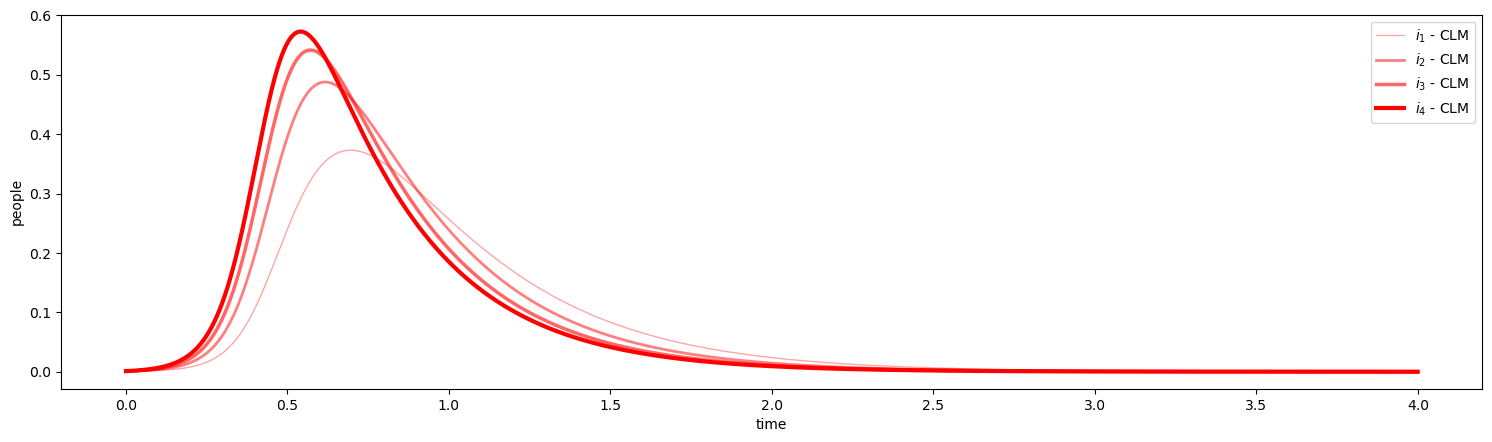

In [48]:
# initial conditions
w = .25 #proportion of population in each compartment
i_0 = 0.001 #initial infection
s_0 = 0.999 # initial susceptible
r_0 = 0 # number of initial recovereds

# groups
R_0 = 1.5

# probability of contact
p_1 = 1
p_2 = 2
p_3 = 3
p_4 = 4

p = p_1, p_2, p_3, p_4

c_bar = 0.45 # from 2b, contact
gamma = 3

coeffs = c_bar, p, gamma, w

# timing
dt = 0.001 # time step
t_max = 4 # maximum time


IC = [s_0, i_0, r_0] #initial conditions

#initialize the plotting
fig, ax = plt.subplots(1,1, figsize = (15,4.5))

# loop over the beta and gamma coefficient values

    
# solve the SIR system of eqns with our forward Euler function above
s, i, r, t = forwardEulerSIR(IC, dt, t_max, coeffs)

# plot 


alphalist = [ .35, .5, .6, 1]
linewidths  = [1, 2, 2.5, 3]
for l in range(4):
    ax.plot(t, i[:,l],color = 'r', alpha = alphalist[l] , linewidth=linewidths[l])
ax.legend([r'$i_1$ - CLM', r'$i_2$ - CLM', r'$i_3$ - CLM', r'$i_4$ - CLM'])
ax.set_xlabel('time')
ax.set_ylabel('people')

#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('is.png')

### 2d

In [49]:
def ave_sus(ps, ss):
    num = np.zeros(len(ss))
    den = np.zeros(len(ss))
    for i in range(len(ps)):
        num[:] = ps[i]*ss[:,i] + num[:]
        den[:] = ss[:,i] + den[:]
    p_bar = num/den
    return p_bar

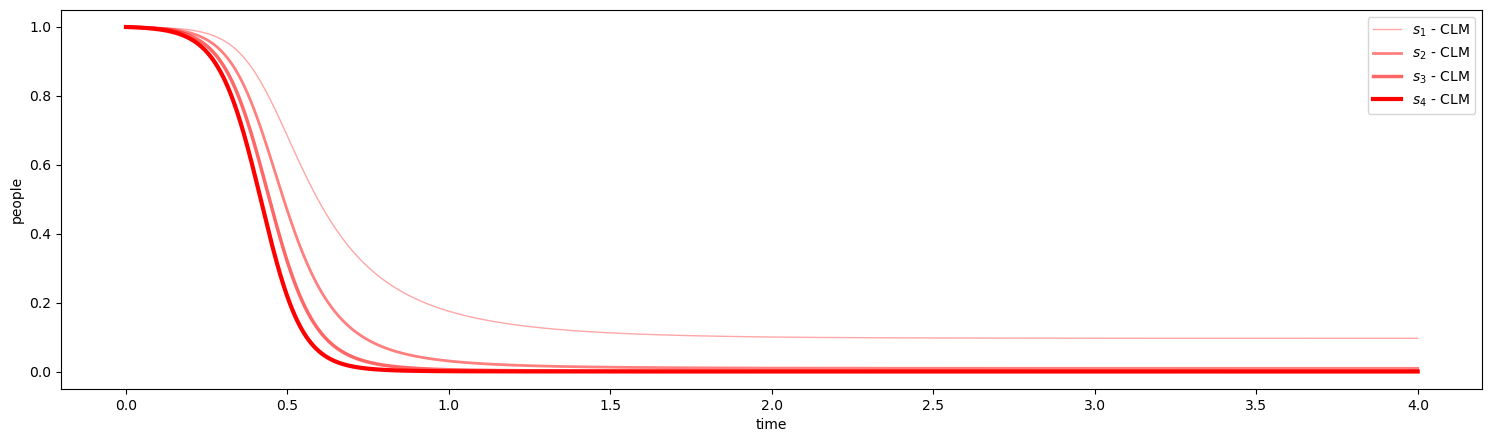

In [50]:
# calculate the average susceptibility for the time
p_bar = ave_sus(p, s)

# plot 
alphalist = [ .35, .5, .6, 1]
linewidths  = [1, 2, 2.5, 3]

fig, ax = plt.subplots(1, 1, figsize=(15, 4.5))

for l in range(4):
    ax.plot(t, s[:,l],color = 'r', alpha = alphalist[l] , linewidth=linewidths[l])
ax.legend([r'$s_1$ - CLM', r'$s_2$ - CLM', r'$s_3$ - CLM', r'$s_4$ - CLM'])
ax.set_xlabel('time')
ax.set_ylabel('people')
#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('ss.png')
plt.show()


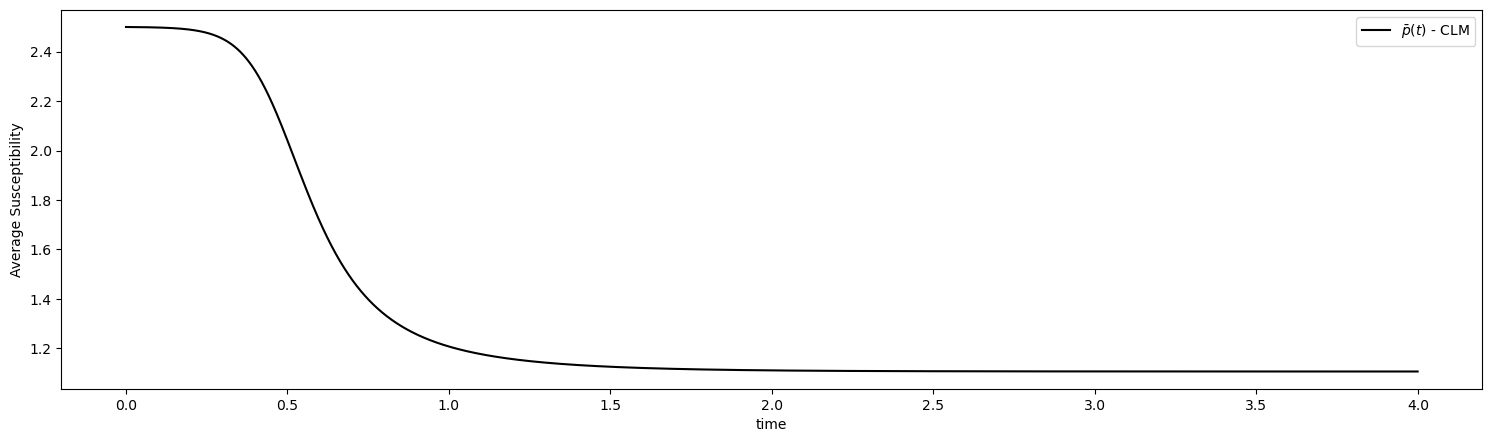

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4.5))

ax.plot(t, p_bar, color='k')
ax.legend([r'$\bar{p}(t)$ - CLM'])
ax.set_xlabel('time')
ax.set_ylabel('Average Susceptibility')
#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('p_bar.png')
plt.show()


## Problem 3

Code provided by Dan in the Homework: 

In [2]:
from scipy.stats import nbinom
k = 10000  # Dispersion Parameter k
R0 = 3  # Mean R0
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)
draw = nbinom.rvs(n=n, p=p)
draws = nbinom.rvs(n=n, p=p, size=10)


Write code for a branching process that, starting from a single infection, draws G genera-
tions, with each infection creating N B(R0, k) additional infections. Use your code to es-
timate q the probability (class notes) that an epidemic dies in finite time, for R0 = 3 and
k = 0.1, 0.5, 1.0, 5.0, and 10.0.

Provide your answers in a table, out to 3 decimal places

*The below code combines parts 3a and 3c*

In [26]:
def branching(gens, k, R0):
    i = [1]
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)

    for g in range(gens):
        # generate a negative binomial distribution of the size of the previous generation. This will get you the next generation's size.
        nb = nbinom.rvs(n=n, p=p, size=int(i[g]))
        # new infections = the sum of this generation's negative binomial distribution
        i.append(sum(nb))
        if i[g] == 0:
            return i, g  # epidemic died out, finite
        if i[g] >= 1000: # I originally made this threshold like 1,000,000 but it took forever so I lowered it to 1000
            return i, g # epidemic infinite

k & q
0.1 & 0.840 \\
0.5 & 0.498 \\
1.0 & 0.335 \\
5.0 & 0.118 \\
10.0 & 0.089 \\


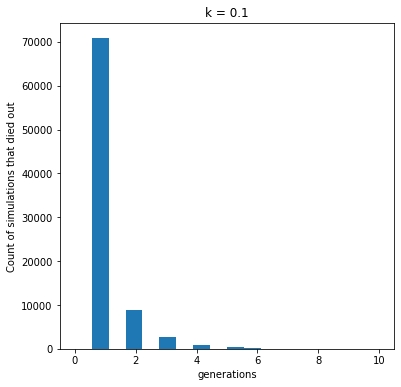

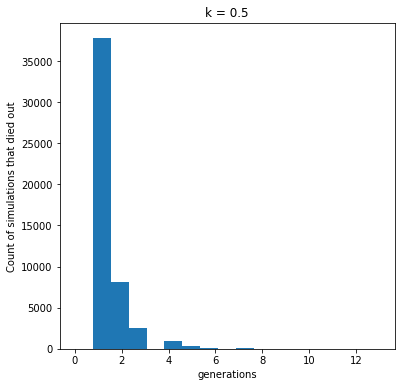

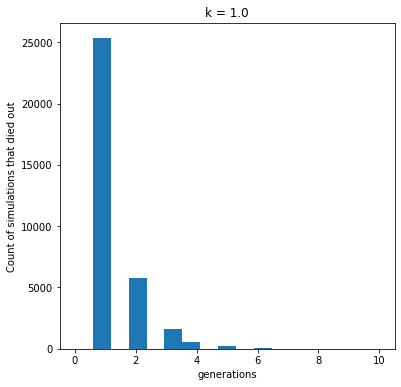

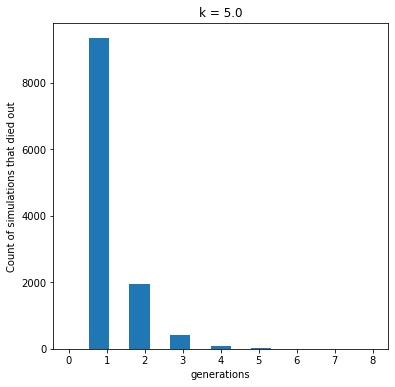

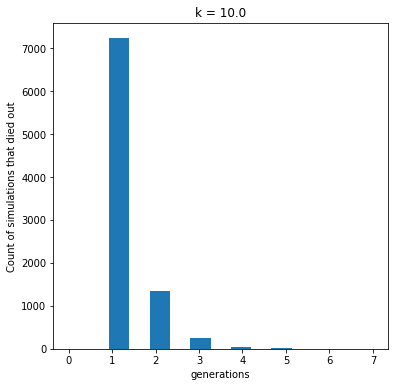

In [33]:
ks = [0.1, 0.5, 1.0, 5.0, 10.0]

R_0 = 3
gens = 100
tests = 100000 # run the simulation over x number of tests/trials to determine probability of dying out in a finite time. 

# Calculate probability of epidemic death
print("k & q") # formatted like a table for easy copying :) 
for k in ks:
    epiDied = 0 
    whenDied = [0]
    for t in range(tests): # trials 
        i, g = branching(gens, k, R_0) 
        i_end = i[-1] 

        if i_end == 0: 
            epiDied += 1 # number of times epidemic died out. 
            whenDied.append(g)
        else:
            continue
    q = epiDied / tests # probability that the epidemic died out over # of trials
    fig, ax = plt.subplots(1,1, figsize = (6,6))
    ax.hist(whenDied, bins = 'auto')
    ax.set_title('k = {}'.format(k))
    ax.set_xlabel('generations')
    ax.set_ylabel('Count of simulations that died out')
    plt.savefig('hist{}.png'.format(k))
    print(k, "&", "{:.3f}".format(q), "\\\\")